In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# def detect_lines(
#     img, threshold1=50, threshold2=150, apertureSize=3, minLineLength=100, maxLineGap=10
# ):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
#     edges = cv2.Canny(gray, threshold1, threshold2, apertureSize)  # detect edges
#     return cv2.HoughLinesP(
#         edges,
#         1,
#         np.pi / 180,
#         125,
#         minLineLength,
#         maxLineGap,
#     )  # detect lines

In [3]:
img = cv2.imread('pool.png')

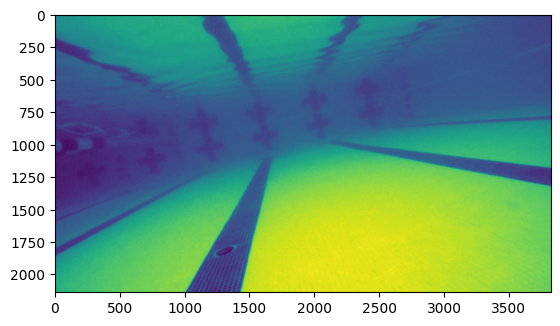

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # convert to grayscale
plt.imshow(gray)

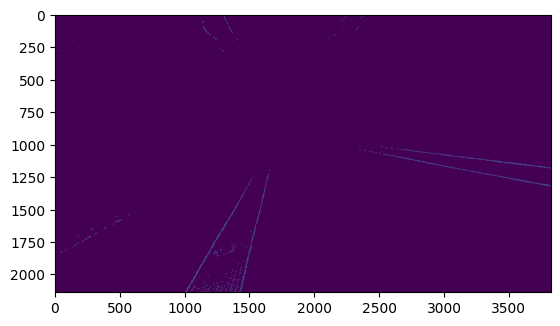

In [5]:
edges = cv2.Canny(gray, 25, 35, 3)  # detect edges
plt.imshow(edges)

In [6]:
def draw_lines(img, lines, color=(0, 255, 0)):
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), color, 2)

In [7]:
# lines = detect_lines(img, 10, 20, 5)
lines = cv2.HoughLinesP(
        edges,
        rho = 1,
        theta = np.pi / 180,
        threshold = 100,
        minLineLength = 150,
        maxLineGap = 20
    )
print(lines)

[[[2533 1077 2752 1120]]

 [[3266 1117 3467 1141]]

 [[3117 1097 3777 1178]]

 [[2536 1079 2803 1130]]

 [[3428 1250 3619 1288]]

 [[2540 1080 2799 1131]]

 [[1068 2024 1448 1392]]

 [[1173 1852 1405 1465]]

 [[3471 1139 3624 1157]]

 [[1464 1947 1546 1618]]

 [[1303 1636 1406 1465]]

 [[1469 1945 1511 1779]]

 [[3041 1176 3694 1303]]

 [[1551 1609 1617 1343]]

 [[3361 1237 3512 1266]]

 [[1358 1540 1471 1345]]

 [[1582 1475 1622 1315]]

 [[1582 1480 1623 1316]]

 [[1049 2061 1179 1844]]

 [[1342 1566 1513 1269]]

 [[3458 1142 3651 1166]]

 [[1552 1608 1605 1394]]

 [[1006 2136 1170 1862]]

 [[2824 1136 3093 1188]]

 [[3504 1262 3722 1304]]

 [[1012 2134 1138 1917]]

 [[1427 2132 1464 1968]]

 [[1006 2134 1115 1952]]

 [[1531 1680 1572 1517]]

 [[1190 1818 1321 1600]]

 [[1482 1884 1524 1714]]

 [[1429 2106 1470 1940]]]


In [8]:
# draw_lines(img, lines)
def get_lines(img, lines):
    equations = {}
    for line in lines:
        x1, y1, x2, y2 = line[0]
        slope = (y2-y1) / (x2 - x1)
        y_intercept = y2 - x2*slope
        x_intercept = -y_intercept / slope
        
        pair = (slope, x_intercept)
        to_be_popped = []
        avg_slope = pair[0]
        avg_intercept = pair[1]
        identical_counter = 1
        for pairing in equations:
            if abs(min(pairing[0], pair[0])/max(pairing[0], pair[0])) > 0.98 and abs(min(pairing[1], pair[1])/max(pairing[1], pair[1])) > 0.98:
                avg_slope+=(pairing[0])
                avg_intercept+=(pairing[1])
                identical_counter+=1
                to_be_popped.append(pairing)
        
        for removal in to_be_popped:
            equations.pop(removal)
        equations[(avg_slope / identical_counter, avg_intercept / identical_counter)] = ((x1,y1), (x2,y2))

        
        to_be_popped.clear()
    
    for eq in equations:
        x1 = equations[eq][0][0]
        y1 = equations[eq][0][1]
        x2 = equations[eq][1][0]
        y2 = equations[eq][1][1]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    return equations


In [9]:

def draw_lines(img, equations):
    print(equations)
    for line in equations:
        slope = line[0]
        x1 = equations[line][0][0]
        y1 = equations[line][0][1]
        cv2.putText(img, str(slope), (x1,y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    plt.imshow(img)
    plt.show()


{(-0.8276885942368916, -1433.2014384477613): ((3504, 1262), (3722, 1304)), (-4.4324324324324325, 1907.9999999999998): ((1427, 2132), (1464, 1968)), (-1.680047816918396, 2275.021874766252): ((1190, 1818), (1321, 1600)), (-4.030197444831591, 1949.8371909145062): ((1429, 2106), (1470, 1940))}


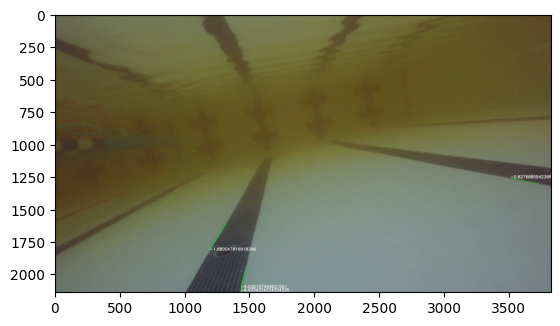

In [10]:
draw_lines(img, get_lines(img, lines))


In [11]:
def detect_lanes(img, lines):
    eqs = get_lines(img, lines)
    res = {key: eqs[key] for key in sorted(eqs.keys(), key = lambda ele: ele[1])}

    cnt = 0
    lanes = []
    line1 = None
    line2 = None

    for key in res:
        if(cnt%2==0):
            line1 = (key,res[key])
        if(cnt%2!=0):
            line2 = (key,res[key])
        if line1 != None and line2!=None:
            lanes.append([line1, line2])
            line1 = None
            line2 = None
        cnt+=1

    print(lanes)
    return lanes



In [12]:
def draw_lanes(img, lanes):
    colors = [(0,255,0), (255, 0, 0), (0, 0, 255), (128, 128, 128)]
    cnt = 0
    for lane in lanes:
        line1 = lane[0]
        line2 = lane[1]
        x1 = line1[1][0][0]
        y1 = line1[1][0][1]
        x2 = line1[1][1][0]
        y2 = line1[1][1][1]
        cv2.line(img, (x1, y1), (x2, y2), colors[cnt], 2)
        x1 = line2[1][0][0]
        y1 = line2[1][0][1]
        x2 = line2[1][1][0]
        y2 = line2[1][1][1]
        cv2.line(img, (x1, y1), (x2, y2), colors[cnt], 2)
        cnt+=1
    plt.imshow(img)


In [13]:
lanes = detect_lanes(img, lines)
# draw_lanes(img, lanes)

[[((-0.8276885942368916, -1433.2014384477613), ((3504, 1262), (3722, 1304))), ((-4.4324324324324325, 1907.9999999999998), ((1427, 2132), (1464, 1968)))], [((-4.030197444831591, 1949.8371909145062), ((1429, 2106), (1470, 1940))), ((-1.680047816918396, 2275.021874766252), ((1190, 1818), (1321, 1600)))]]


In [14]:
from lane_following import *

arr = get_lane_center(lanes)
print(recommend_direction(arr[0], arr[1]))

forward
